# Monte Carlo Simulation

This file implements a simulation for various specified DGP's. 

A number of dependencies are necessary - particularly the accompanying function files. 

In [1]:
# IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import os 
import pickle
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import importlib

#Import own files 
import sys 
sys.path.append(r'F:\Documents\TheEnd\Code\Functions')
sys.path.append(r'C:\Users\rbjoe\Dropbox\Kugejl\10.semester\TheEnd\Code\Functions')
import monte_carlo_simulation as mc
import dgp_stuff as dgp
import neural_net as nn
import estimators as est
import summaries as smr
import auxilliary as aux
import figurez as figz
import tablez as tblz


###############################################################################
### Load parameters (data is in single files)
# Load parameters
parameters, estimators, g_functions = \
        mc.MC_load_pars('5_1_v2_reg_prod_2018_06_26') 


#importlib.reload(smr)
#smr.parameter_print(parameters)
#smr.parameter_print(estimators)
#smr.parameter_print(g_functions)

figtitle = '5_1_v2_reg_'

### Distribution of average marginal effects 

In [1]:
# Average marginal effects 
res_mrgeffs_avg = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
figz.fig_wrapper_g(g_series = res_mrgeffs_avg, g_figfunc = figz.fig_distribution, 
                  g_functions=g_functions, estimators=estimators, 
                  save_file=True, filename=figtitle+'mrgeff_avg_distributions', 
                  legend = 'figure',
                  share_y=False, share_x=False)


NameError: name 'smr' is not defined

In [ ]:
figz.fig_wrapper_g(g_series = res_mrgeffs_avg, g_figfunc = figz.fig_distribution, 
                  g_functions=g_functions, estimators=estimators, 
                  save_file=True, filename=figtitle+'mrgeff_avg_distributions', 
                  legend = 'figure',
                  share_y=False, share_x=False)

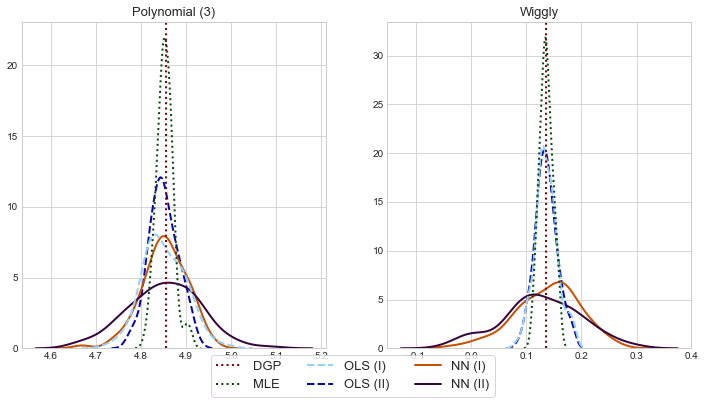

In [23]:
# Average marginal effects 
res_mrgeffs_avg = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
figz.fig_wrapper_g(g_series = res_mrgeffs_avg, g_figfunc = figz.fig_distribution, 
                  g_functions=g_functions, estimators=estimators, 
                  save_file=True, filename=figtitle+'mrgeff_avg_distributions_subset', 
                  legend = 'figure',
                  n_rows =1, n_cols=2, 
                  subset=['Polynomial_3', 'Wiggly'],
                  share_y=False, share_x=False)

### Mean RMSE for marginal effects

In [4]:
# MRMSE for marginal effects
res_mrgeffs_mrmse = smr.comp_wrapper_gseries(smr.comp_mrmse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])

tblz.table_wrapper_g(g_series = res_mrgeffs_mrmse, cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
#                    models = ['MLE', 'Logit (I)', 'Logit (II)', 'NN (I)', 'NN (II)'],
                    save_file = True, filename=figtitle+'table_mrgeff_MRMSE', 
                    caption='Mean RMSE for marginal effects.', 
                    label='fig_mrmse', 
                    note1='Cells show averages across simulations, with standard errors in parentheses.' \
                            + ' Each row represents ' + '{:,}'.format(parameters['M']) + ' simulations' \
                            +  ' with ' + '{:,}'.format(parameters['k']) + ' independent variables.' \
                            + ' Estimators are trained on ' + '{:,}'.format(parameters['n']) + ' observations.' \
                            + ' Reported values are from a test set of equal size.' \
                            )

C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,DGP,MLE,OLS (I),OLS (II),NN (I),NN (II)
Linear,0.00 (0.000),0.01 (0.002),0.01 (0.003),0.02 (0.004),0.07 (0.006),0.09 (0.009)
Polynomial (2),0.00 (0.000),0.01 (0.004),1.25 (0.002),0.02 (0.004),0.34 (0.016),0.32 (0.014)
Polynomial (3),0.00 (0.000),0.02 (0.003),5.41 (0.013),3.16 (0.010),1.90 (0.079),1.54 (0.118)
Pointy,0.00 (0.000),2.85 (0.651),7.42 (0.007),5.26 (0.011),1.50 (0.118),1.26 (0.061)
Wiggly,0.00 (0.000),0.02 (0.004),2.32 (0.003),2.03 (0.004),0.82 (0.088),0.67 (0.029)
Trig. pol (3),0.00 (0.000),0.01 (0.004),0.44 (0.001),0.25 (0.001),0.14 (0.006),0.18 (0.039)
Ackley,0.00 (0.000),1.17 (0.019),1.22 (0.001),1.19 (0.001),0.99 (0.159),0.80 (0.032)
Rastrigin,0.00 (0.000),0.03 (0.009),4.64 (0.003),4.64 (0.003),2.27 (0.124),2.17 (0.183)
Drop-Wave,0.00 (0.000),inf (nan),2.70 (0.003),2.67 (0.003),1.96 (0.039),0.84 (0.041)


### Mean MSE for marginal effects

In [12]:
# MMSE for marginal effects
res_mrgeffs_mmse = smr.comp_wrapper_gseries(smr.comp_mmse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])

tblz.table_wrapper_g(g_series = res_mrgeffs_mmse, cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
#                    models = ['MLE', 'Logit (I)', 'Logit (II)', 'NN (I)', 'NN (II)'],
                    save_file = True, filename=figtitle+'table_mrgeff_MMSE', 
                    caption='Mean MSE for marginal effects.', 
                    label='fig_mrmse', 
                    note1='Cells show averages across simulations, with standard errors in parentheses.' \
                            + ' Each row represents ' + '{:,}'.format(parameters['M']) + ' simulations' \
                            +  ' with ' + '{:,}'.format(parameters['k']) + ' independent variables.' \
                            + ' Estimators are trained on ' + '{:,}'.format(parameters['n']) + ' observations.' \
                            + ' Reported values are from a test set of equal size.' \
                            )

C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,DGP,MLE,OLS (I),OLS (II),NN (I),NN (II)
Linear,0.00 (0.000),0.00 (0.000),0.00 (0.000),0.00 (0.000),0.00 (0.001),0.01 (0.002)
Polynomial (2),0.00 (0.000),0.00 (0.000),3.25 (0.013),0.00 (0.000),0.16 (0.020),0.13 (0.013)
Polynomial (3),0.00 (0.000),0.00 (0.000),36.20 (0.189),13.21 (0.096),3.82 (0.340),2.50 (0.402)
Pointy,0.00 (0.000),10.66 (6.850),60.51 (0.112),34.15 (0.154),2.41 (0.458),1.65 (0.171)
Wiggly,0.00 (0.000),0.00 (0.000),8.27 (0.028),7.71 (0.032),0.85 (0.180),0.51 (0.051)
Trig. pol (3),0.00 (0.000),0.00 (0.000),0.37 (0.001),0.09 (0.001),0.02 (0.002),0.04 (0.023)
Ackley,0.00 (0.000),2.79 (0.130),2.89 (0.007),2.85 (0.007),1.76 (0.865),0.80 (0.066)
Rastrigin,0.00 (0.000),0.00 (0.001),44.64 (0.083),44.65 (0.083),6.71 (0.837),5.50 (0.968)
Drop-Wave,0.00 (0.000),inf (nan),8.04 (0.017),7.88 (0.016),3.97 (0.153),0.75 (0.076)


### Mean RMSE for expectation

In [6]:
# MRMSE for marginal effects
res_expect_mrmse = smr.comp_wrapper_gseries(smr.comp_mrmse,'res_probs', dgp_series = 'res_probs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])

tblz.table_wrapper_g(g_series = res_expect_mrmse, cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
#                    models = ['MLE', 'Logit (I)', 'Logit (II)', 'NN (I)', 'NN (II)'],
                    save_file = True, filename=figtitle+'table_expect_MRMSE', 
                    caption='Mean RMSE for expectation.', 
                    label='fig_prob_mrmse', 
                    note1='Cells show averages across simulations, with standard errors in parentheses.' \
                            + ' Each row represents ' + '{:,}'.format(parameters['M']) + ' simulations' \
                            +  ' with ' + '{:,}'.format(parameters['k']) + ' independent variables.' \
                            + ' Estimators are trained on ' + '{:,}'.format(parameters['n']) + ' observations.' \
                            + ' Reported values are from a test set of equal size.' \
                            )

,DGP,MLE,OLS (I),OLS (II),NN (I),NN (II)
Linear,0.00 (0.000),0.01 (0.005),0.02 (0.005),0.03 (0.005),0.07 (0.016),0.09 (0.020)
Polynomial (2),0.00 (0.000),0.02 (0.005),2.47 (0.012),0.03 (0.005),0.19 (0.016),0.20 (0.027)
Polynomial (3),0.00 (0.000),0.03 (0.005),9.59 (0.065),4.51 (0.046),0.89 (0.081),0.70 (0.083)
Pointy,0.00 (0.000),3.16 (1.109),11.50 (0.031),6.75 (0.049),0.57 (0.068),0.54 (0.101)
Wiggly,0.00 (0.000),0.03 (0.004),2.81 (0.009),2.65 (0.011),0.58 (0.127),0.39 (0.062)
Trig. pol (3),0.00 (0.000),0.02 (0.005),0.79 (0.002),0.32 (0.004),0.13 (0.019),0.14 (0.021)
Ackley,0.00 (0.000),0.58 (0.022),0.74 (0.002),0.61 (0.001),0.44 (0.128),0.31 (0.017)
Rastrigin,0.00 (0.000),0.02 (0.004),2.38 (0.003),2.38 (0.003),0.73 (0.062),0.75 (0.102)
Drop-Wave,0.00 (0.000),0.76 (1.470),2.07 (0.003),2.03 (0.003),1.15 (0.049),0.37 (0.039)


### Mean MSE for expectation

In [7]:
# MMSE for marginal effects
res_expect_mmse = smr.comp_wrapper_gseries(smr.comp_mmse,'res_probs', dgp_series = 'res_probs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])

tblz.table_wrapper_g(g_series = res_expect_mrmse, cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
#                    models = ['MLE', 'Logit (I)', 'Logit (II)', 'NN (I)', 'NN (II)'],
                    save_file = True, filename=figtitle+'table_expect_MMSE', 
                    caption='Mean MSE for expectation.', 
                    label='fig_prob_mrmse', 
                    note1='Cells show averages across simulations, with standard errors in parentheses.' \
                            + 'Each row represents ' + '{:,}'.format(parameters['M']) + ' simulations' \
                            +  ' with ' + '{:,}'.format(parameters['k']) + ' independent variables.' \
                            + ' Estimators are trained on ' + '{:,}'.format(parameters['n']) + ' observations.' \
                            + ' Reported values are from a test set of equal size.' \
                            )

,DGP,MLE,OLS (I),OLS (II),NN (I),NN (II)
Linear,0.00 (0.000),0.01 (0.005),0.02 (0.005),0.03 (0.005),0.07 (0.016),0.09 (0.020)
Polynomial (2),0.00 (0.000),0.02 (0.005),2.47 (0.012),0.03 (0.005),0.19 (0.016),0.20 (0.027)
Polynomial (3),0.00 (0.000),0.03 (0.005),9.59 (0.065),4.51 (0.046),0.89 (0.081),0.70 (0.083)
Pointy,0.00 (0.000),3.16 (1.109),11.50 (0.031),6.75 (0.049),0.57 (0.068),0.54 (0.101)
Wiggly,0.00 (0.000),0.03 (0.004),2.81 (0.009),2.65 (0.011),0.58 (0.127),0.39 (0.062)
Trig. pol (3),0.00 (0.000),0.02 (0.005),0.79 (0.002),0.32 (0.004),0.13 (0.019),0.14 (0.021)
Ackley,0.00 (0.000),0.58 (0.022),0.74 (0.002),0.61 (0.001),0.44 (0.128),0.31 (0.017)
Rastrigin,0.00 (0.000),0.02 (0.004),2.38 (0.003),2.38 (0.003),0.73 (0.062),0.75 (0.102)
Drop-Wave,0.00 (0.000),0.76 (1.470),2.07 (0.003),2.03 (0.003),1.15 (0.049),0.37 (0.039)


### Distribution of marginal effects 

In [8]:
#importlib.reload(smr)
# Concatenate marginal effects
res_mrgeffs_pooled = smr.comp_wrapper_gseries(smr.comp_pool_simulations, 'res_mrgeffs', 
                                           g_functions=g_functions,
                                           comp_kws = {'coefficient':1}, #Look at one beta.
                                           filename = parameters['filename'])



C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


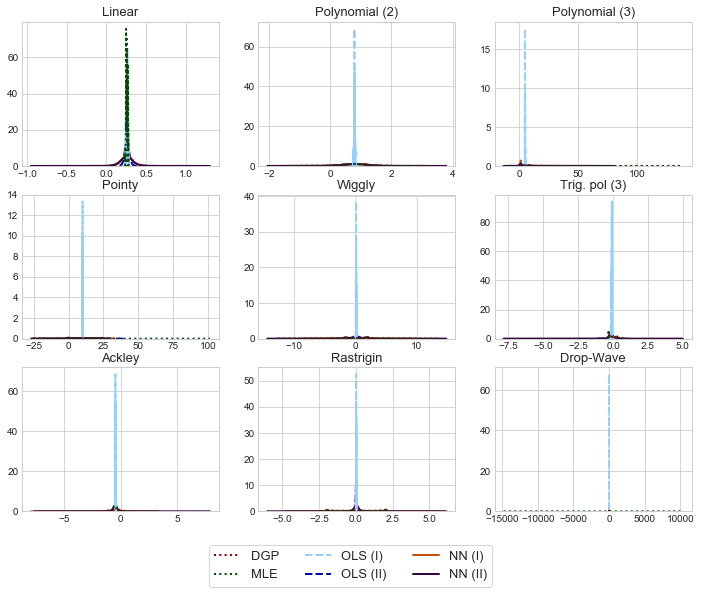

In [9]:
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   #models = ['DGP', 'Logit (I)', 'NN (I)'],
                   #n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  #ymax = 30, ymin=0,
                  #subset=['Logit', 'Rastrigin'], 
                  )

C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


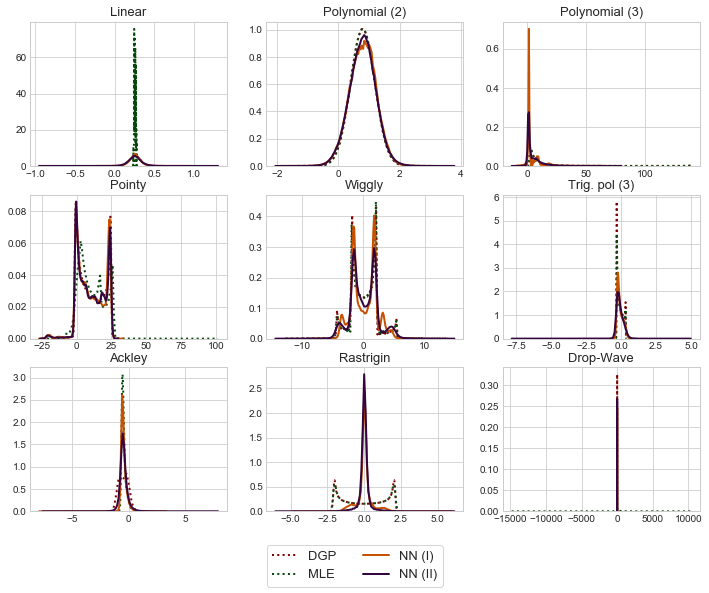

In [10]:
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   models = ['DGP', 'MLE', 'NN (I)','NN (II)'],
                   #n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  #ymax = 30, ymin=0,
                  #subset=['Logit', 'Rastrigin'], 
                  )

C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rbjoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


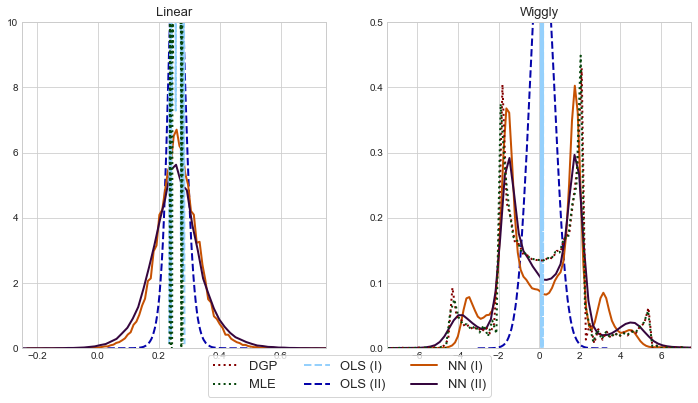

In [21]:
importlib.reload(figz)
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   #models = ['DGP', 'MLE', 'NN (I)','NN (II)'],
                   n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs_subset',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  ymax = [10,0.5], ymin=0,
                   xmax = [0.75, 7.5], xmin = [-0.25, -7.5],
                  subset=['Linear', 'Wiggly'], 
                  )